<a href="https://colab.research.google.com/github/someDeveloperDH/game/blob/main/RSP_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024-1학기 딥러닝 - 기말 팀 프로젝트
## **가위 바위 보 분류하기(RPS Classification)**
   

T1 (박동혁, 이유준, 배도현)

**1차 모델의 문제점 및 개선 방안**

#### 1. 모델의 문제점

- Training & Validation Accuracy 그래프에서,   
Training accracy는 높으나 Validation accuracy는 낮은 경향을 보임   
   
- Training & Validation Loss 그래프에서,   
Training loss는 낮으나 Validation loss는 높은 경향을 보임   

    
**따라서**   
모델이 Training Data에 과적합 되었음을 알 수 있다.

결국 Test Accuracy 그래프와 Test Loss 그래프에서 볼 수 있듯,    
모델 성능이 매우 좋지 않았다.

#### 2 개선 방안

일반적으로 과적합 상황에서 CNN 모델을 개선할 수 있는 방안은 다음과 같다.
1. 학습 데이터 양 증대 및 전처리 개선
2. 모델의 복잡도 조정 혹은 전이 학습
3. 정규화 기법 사용(드롭아웃, 배치 정규화 등)
4. 하이퍼파라미터 조정
5. Loss Function과 Optimizer 변경
6. 앙상블

### < 개선과정 - 데이터 증강 및 전이 학습>


###<1차 시도>
test - loss: 0.0224 - accuracy: 0.9938

val  - val_loss: 1.6785 - val_accuracy: 0.7962

test -  loss: 1.6164 - accuracy: 0.8037

test에서는 문제가 없다. val 에서는 정확도는 문제 없이 올라가지만 손실도 올라간다

결론 : 학습용 데이터에만 최적화. 과대적합

수정사항 : dropout 0.5를 0.2로 수정


###<2차 시도>
test - loss: 0.0213 - accuracy: 0.9948

val  - val_loss: 2.4082 - val_accuracy: 0.7846

test -  loss: 2.3706 - accuracy: 0.7815

1차와 비교시, val 과 test 의 손실 및 정확도가 더 안 좋아짐

결론 : 1차에서 정확도가 계속 증가 추세였으므로 에포클르 늘려보기. 정확도가 올라가면 손실은 원래 줄어들어야한다. 모델의 복잡도를 줄여보기.

수정사항 : 1)dropout 0.2를 0.5로 수정, 2)에포크 15를 20으로,  3)Dense 512를 256으로

###<3차 시도>
test -  loss: 0.0159 - accuracy: 0.9933

val  -val_loss: 1.8318 - val_accuracy: 0.7731

test -  loss: 1.7829 - accuracy: 0.7778

중간 과정을 확인결과 처음으로 val에서 정확도 80이 나옴. 1처와 비슷한 결과

결론 : 에포크와 densesms 지금은 상관 없는듯 하다.

수정사항 : 1)데이터 증강 , 2)에포크 20를 15으로

###<4차 시도>
test - loss: 1.0546 - accuracy: 0.4005

val  -val_loss: 1.0455 - val_accuracy: 0.4385

test -  

이 정도의 성능 저하는 증강시, 너무 많이 변형을 시켜 모델이 혼란 스러워 진 것이 문제

결론 : 증강에서 변형 정도를 최소화 시키기

수정사항 :

```
# 기존
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
```
```
# 수정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
```


###<5차 시도>
test - loss: 0.6089 - accuracy: 0.7358

val  -val_loss: 0.5492 - val_accuracy: 0.7923

test -   loss: 0.5423 - accuracy: 0.7926

모든 데이터 셋에서 안정적으로 정확도는 증가하고 손실은 감소 중.

결론 : 에포크를 늘리기

수정사항 :epochs=15 를 30으로

###<6차 시도>
test -loss: 0.2391 - accuracy: 0.9114

val  -val_loss: 0.3659 - val_accuracy: 0.8577

test -    loss: 0.3696 - accuracy: 0.8556

모든 데이터 셋에서 안정적으로 정확도는 증가하고 손실은 감소 중.
마지막엔 거의 90 초반이었음.

결론 : 그대로 한번 더

수정사항 : 그대로 한번 더

###<7차 시도>
test - - loss: 0.1608 - accuracy: 0.9358

val  - val_loss: 0.2642 - val_accuracy: 0.9000

test -    loss: 0.2625 - accuracy: 0.9000

성능이  더디게 좋아진다.

결론 : 너무 느리고 특정 구간에서 벗어나지를 못한다.

수정사항 : 모델각층에 batch정규화 추가, 에포크 30 에서 100으로
###<8차 시도>
7차 시도가 제일 좋은 결과


###<9차시도 ~ n차시도>
VGG16 과 ResNet50으로 학습 시도 - 배도현

전이 학습을 위한 모델로 Inception V4와 ResNet을 Ensemble 한 모델을 시도하였다.  - 이유준 (이 방법 선택)

이유준 팀원 방식에서 파라 미터를 수정한 결과 :

test -  - loss: 0.0905 - accuracy: 0.9625

val   - val_loss: 0.1001 - val_accuracy: 0.9656

test  - loss: 0.2424 - accuracy: 0.9370

####  학습 준비


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from random import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Data 경로 설정

In [3]:
# 필요시 경로 수정 필수
base_dir = "/content/drive/MyDrive/proj_rsp/RPS"

train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")

train_paper_dir = os.path.join(train_dir,"paper") # 각 650개
train_rock_dir = os.path.join(train_dir,"rock")
train_scissors_dir = os.path.join(train_dir,"scissors")

test_paper_dir = os.path.join(test_dir,"paper") # 각 90개
test_rock_dir = os.path.join(test_dir,"rock")
test_scissors_dir = os.path.join(test_dir,"scissors")

print(f"훈련 이미지 개수 (paper): {len(os.listdir(train_paper_dir))}")
print(f"훈련 이미지 개수 (rock): {len(os.listdir(train_rock_dir))}")
print(f"훈련 이미지 개수 (scissors): {len(os.listdir(train_scissors_dir))}")

print(f"테스트 이미지 개수 (paper): {len(os.listdir(test_paper_dir))}")
print(f"테스트 이미지 개수 (rock): {len(os.listdir(test_rock_dir))}")
print(f"테스트 이미지 개수 (scissors): {len(os.listdir(test_scissors_dir))}")

훈련 이미지 개수 (paper): 650
훈련 이미지 개수 (rock): 650
훈련 이미지 개수 (scissors): 650
테스트 이미지 개수 (paper): 90
테스트 이미지 개수 (rock): 90
테스트 이미지 개수 (scissors): 90


####  Data 전처리

In [4]:
# Data Augmentation 적용
train_datagen = ImageDataGenerator(
    rotation_range=45,
    channel_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,

    rescale = 1./255, validation_split=0.3)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
batch_size = 32
test_batch_size = batch_size * 2
target_size = (224, 224) # input image size

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',  # subset 미설정 시 분리되지 않음
                                                    batch_size=batch_size,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=target_size)

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         subset='validation',
                                                              batch_size=batch_size,
                                                              color_mode='rgb',
                                                              class_mode='categorical',
                                                              target_size=target_size)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=64,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=target_size)

print(f"훈련 이미지 개수: {train_generator.samples}")
print(f"검증 이미지 개수: {validation_generator.samples}")
print(f"테스트 이미지 개수: {test_generator.samples}")

Found 1365 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
훈련 이미지 개수: 1365
검증 이미지 개수: 585
테스트 이미지 개수: 270


In [6]:
# 폴더기준으로 자동으로 클래스 나눈거 확인
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

####  모델 생성

Base Model로 InceptionV3를 이용하고, 가져온 모델은 학습시키지 않게 한다.

In [7]:
base_model_InceptionV3 = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model_InceptionV3.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [8]:
model = tf.keras.models.Sequential([
    base_model_InceptionV3,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_steps=10,
    verbose=1)

Epoch 1/100
10/10 [==============================] - 302s 31s/step - loss: 1.2762 - accuracy: 0.3625 - val_loss: 1.1023 - val_accuracy: 0.3938
Epoch 2/100
10/10 [==============================] - 154s 16s/step - loss: 1.1130 - accuracy: 0.4250 - val_loss: 0.9989 - val_accuracy: 0.5188
Epoch 3/100
10/10 [==============================] - 106s 11s/step - loss: 0.9294 - accuracy: 0.6214 - val_loss: 0.7923 - val_accuracy: 0.7094
Epoch 4/100
10/10 [==============================] - 64s 7s/step - loss: 0.7573 - accuracy: 0.7411 - val_loss: 0.7184 - val_accuracy: 0.7437
Epoch 5/100
10/10 [==============================] - 50s 5s/step - loss: 0.6777 - accuracy: 0.7937 - val_loss: 0.7167 - val_accuracy: 0.8031
Epoch 6/100
10/10 [==============================] - 34s 3s/step - loss: 0.6715 - accuracy: 0.8281 - val_loss: 0.6724 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 32s 3s/step - loss: 0.6774 - accuracy: 0.8313 - val_loss: 0.6989 - val_accuracy: 0.8125
Epoch 8

KeyboardInterrupt: 

###<평가 및 확인>

##<test데이터가 포함되어 있지 않음을 확인>

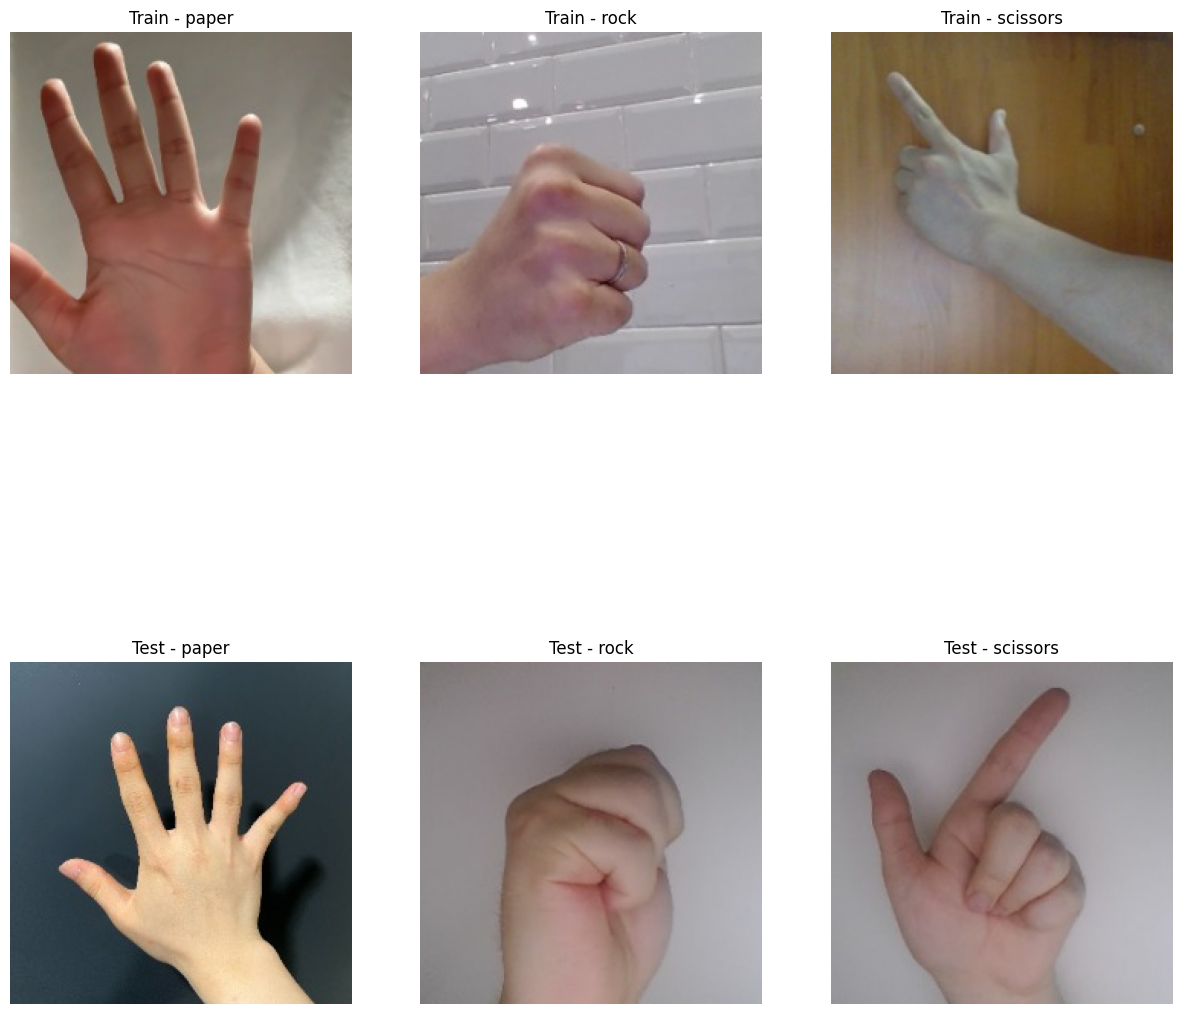

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from random import choice

# 클래스별 트레인 및 테스트 디렉토리 설정
train_dirs = {
    'paper': train_paper_dir,
    'rock': train_rock_dir,
    'scissors': train_scissors_dir
}

test_dirs = {
    'paper': test_paper_dir,
    'rock': test_rock_dir,
    'scissors': test_scissors_dir
}

def plot_random_images_per_class(train_dirs, test_dirs):
    num_classes = len(train_dirs)
    fig, axes = plt.subplots(2, num_classes, figsize=(15, 15))

    for i, (class_name, train_dir) in enumerate(train_dirs.items()):
        # 트레인 클래스의 모든 이미지 파일 목록 추출
        train_images = os.listdir(train_dir)
        # 랜덤하게 파일 선택
        random_train_image_file = choice(train_images)
        # 선택된 트레인 이미지 파일의 전체 경로
        random_train_image_path = os.path.join(train_dir, random_train_image_file)
        # 이미지 로드
        random_train_image = mpimg.imread(random_train_image_path)

        # 테스트 클래스의 모든 이미지 파일 목록 추출
        test_dir = test_dirs[class_name]
        test_images = os.listdir(test_dir)
        # 랜덤하게 파일 선택
        random_test_image_file = choice(test_images)
        # 선택된 테스트 이미지 파일의 전체 경로
        random_test_image_path = os.path.join(test_dir, random_test_image_file)
        # 이미지 로드
        random_test_image = mpimg.imread(random_test_image_path)

        # 트레인 이미지 플롯
        axes[0, i].imshow(random_train_image)
        axes[0, i].set_title(f"Train - {class_name}")
        axes[0, i].axis('off')

        # 테스트 이미지 플롯
        axes[1, i].imshow(random_test_image)
        axes[1, i].set_title(f"Test - {class_name}")
        axes[1, i].axis('off')

    plt.show()

plot_random_images_per_class(train_dirs, test_dirs)



##<평가 - 정확도 및 손실 그래프>

In [13]:
model.evaluate(validation_generator)

19/19 [==============================] - 17s 894ms/step - loss: 0.2617 - accuracy: 0.9043


[0.26174306869506836, 0.904273509979248]

In [14]:
model.evaluate(test_generator)

5/5 [==============================] - 141s 34s/step - loss: 0.2308 - accuracy: 0.9444


[0.23082947731018066, 0.9444444179534912]

##< 평가 - 실제 테스트 set 실제값과  예측값>

2/2 [==============================] - 0s 99ms/step


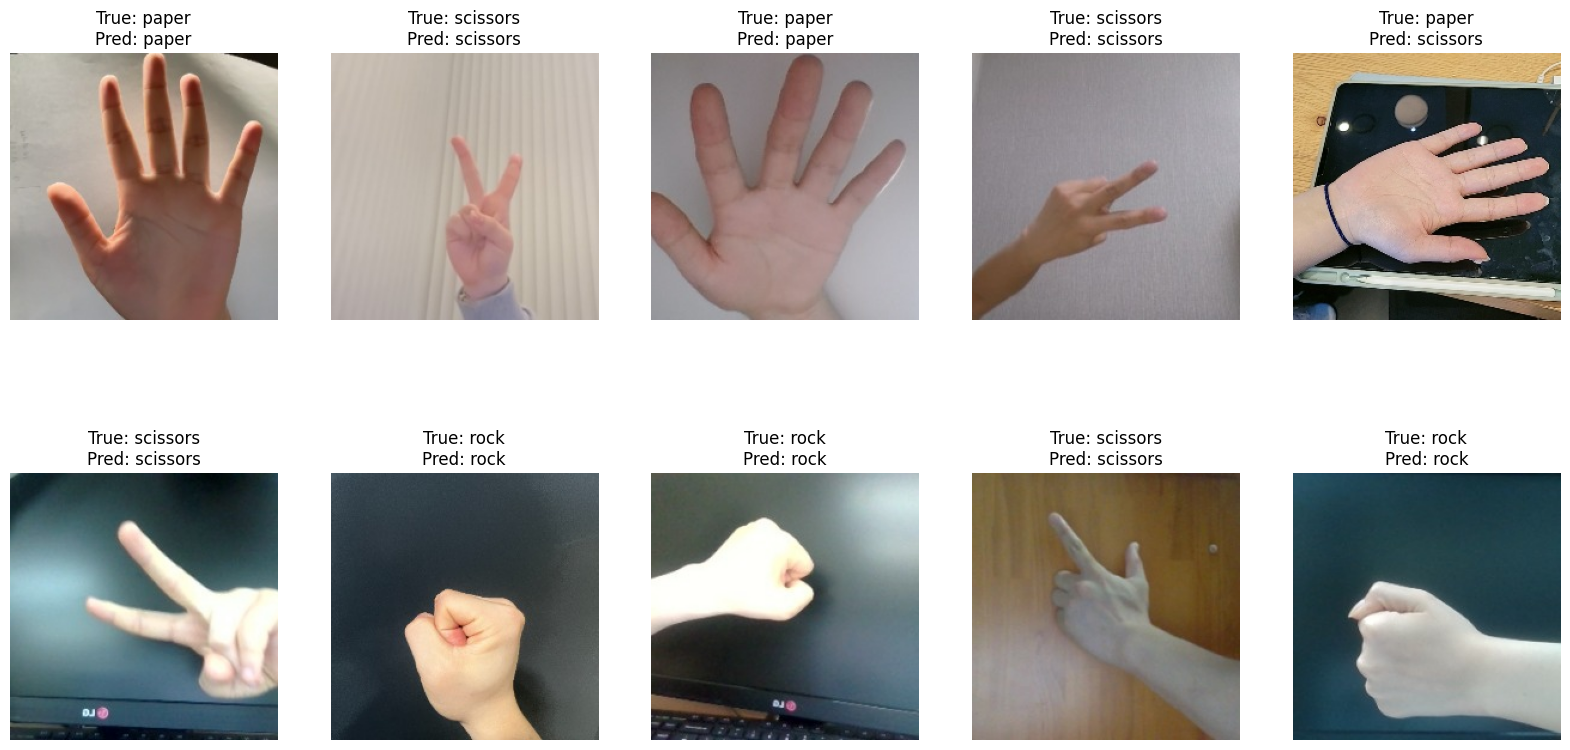

In [22]:
# 테스트 데이터셋에서 샘플 이미지와 예측 결과 시각화
def plot_images_with_predictions(generator, model, num_images=10):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Make predictions
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[true_labels[i]]
        predicted_label = class_labels[predicted_labels[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# 새로운 데이터 배치를 얻기 위해 제너레이터를 반복
plot_images_with_predictions(test_generator, model, num_images=10)

<평가 - ROC 곡선 및 AUC 시각화>

<ipython-input-18-676e403347b7>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


5/5 [==============================] - 3s 225ms/step


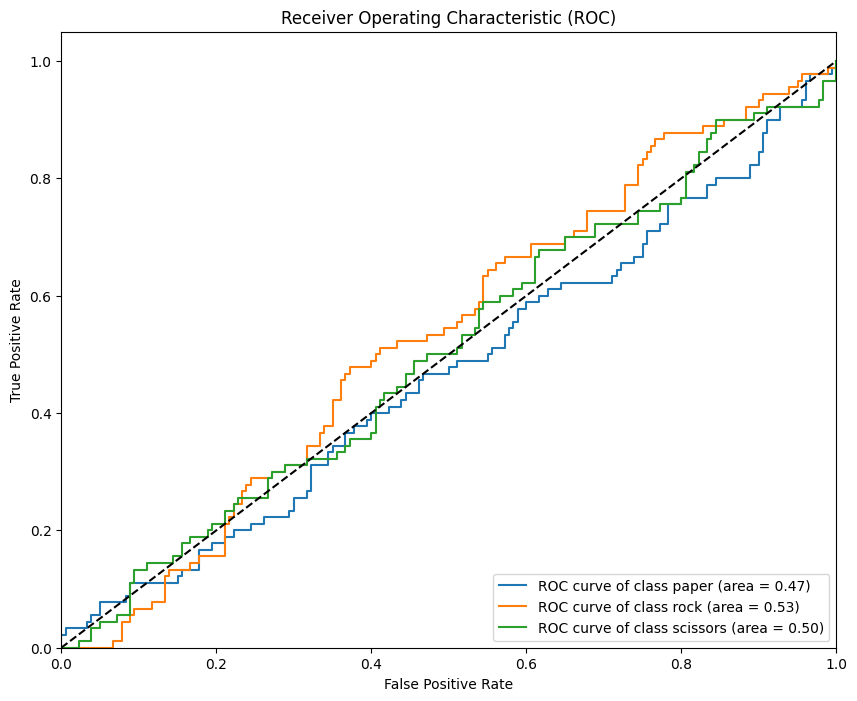

In [18]:
from sklearn.metrics import roc_curve, auc

# 모델을 사용하여 테스트 데이터에 대한 예측 생성
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

# 실제 클래스 레이블 얻기
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# ROC 곡선 및 AUC 시각화
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(true_classes, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## <평가 -  정밀도, 재현율, F1 점수 계산>

In [20]:
from sklearn.metrics import  precision_score, recall_score, f1_score


precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.3214
Recall: 0.3222
F1 Score: 0.3216
